In [1]:
import os
import pandas as pd
from google.colab import drive

In [2]:
drive.mount("/content/drive/")
os.chdir("/content/drive/MyDrive/Holistic Insights/Hackathons/Turn Language into Action")

Mounted at /content/drive/


In [9]:
comments = pd.read_csv('data/comments_sentiment.csv')
print(comments.shape)
posts = pd.read_csv('data/posts_esg.csv')
print(posts.shape)

(25441, 9)
(4957, 23)


In [10]:
comments = comments[comments['sentiment'].notna()].reset_index(drop=True)
print(comments.shape)

(25208, 9)


In [12]:
posts = pd.concat([posts[posts['Environment'].notna()], posts[posts['Social'].notna()], posts[posts['Governance'].notna()]]).reset_index(drop=True)
print(posts.shape)

(163, 23)


In [14]:
len(list(set(posts['urn']) - set(comments['post_urn']))), len(list(set(comments['post_urn']) - set(posts['urn'])))

(48, 2993)

In [15]:
len(list(set(posts['urn'])))

151

In [16]:
len(list(set(comments['post_urn'])))

3096

In [19]:
posts_urn = list(set(posts['urn']))
comments[comments['post_urn'].isin(posts_urn)]

,comment_urn,post_urn,ts,company,author,numLikes,lang,text,sentiment
30,6866500503568834560,6866463689948622849,2021-11-16 22:21:33,antheminc,249328962,0,English,Anthem your job is to pay Healthcare claims no...,9.00
35,6867632921264607232,6866463689948622849,2021-11-20 01:21:22,antheminc,14609359,0,English,"Bravo, Anthem, always expanding the boundaries...",17.20
48,6869994876650459137,6866463689948622849,2021-11-26 13:46:56,antheminc,50075016,0,Other,Broken link.,-88.00
565,6883837356726644736,6883778736668385280,2022-01-03 18:32:01,conocophillips,171580182,2,English,"This is more smoke and mirrors, we don’t need ...",-0.20
575,6884181175196381184,6883778736668385280,2022-01-04 17:18:14,conocophillips,434832371,0,English,Collaborative effort from the industry and sta...,19.60
...,...,...,...,...,...,...,...,...,...
24938,6989094204228476928,6978353257043685376,2022-10-21 05:25:09,kiewit,153879118,1,English,Congratulations Keiwit! Thanks Mark for shari...,23.70
24947,6989144620781703168,6988861803489325056,2022-10-21 08:45:29,pepsico,847484424,0,Spanish,Ojala se pudiera conseguir antes de 2030,0.00
24951,6989159864224673792,6987019518212513792,2022-10-21 09:46:03,amgen,66223579,0,Other,AML1 back up,10.89
25072,6989292769764638720,6988874408790519808,2022-10-21 18:34:11,merck,834554688,0,Other,♥️,0.00


In [20]:
posts['comments_sentiment'] = posts['urn'].apply(lambda x: comments[comments.post_urn == x]['sentiment'].mean())
posts

,urn,ts,company,numLikes,numComments,text,Environment,Positive,Waste and Emissions Management,Social,...,Waste and Emission Management,Environmental Opportunities,Human Capital,Governance,Legal Compliance,Workplace and Product Safety,Business Ethics and Transparency,Product Stewardship,Environmental Crime,comments_sentiment
0,6866463689948622849,2021-11-16 19:55:16,antheminc,107,5,"When we minimize pollution, protect human righ...",10.0,10.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.450000
1,6883778736668385280,2022-01-03 14:39:05,conocophillips,416,31,“Meeting the world’s energy demand during a tr...,55.0,55.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.020000
2,6887458729034350593,2022-01-13 18:22:03,petsmart,119,0,PetSmart is honored to return as presenting sp...,10.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6891435011703140352,2022-01-24 17:42:23,petsmart,67,1,PetSmart Charities helps make the world a bett...,10.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,6893955452908949505,2022-01-31 16:37:43,gap,35,2,Take a look at this incredible project by GAP ...,10.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,6952710301196664832,2022-07-12 19:48:30,jabil,66,2,"""As the planet warms up, corporations are feel...",50.0,10.0,15.0,NaN,...,NaN,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,7.400000
159,6955160310936731648,2022-07-19 14:03:58,kiewit,480,10,The Indeck Niles Energy Center has entered ser...,25.0,10.0,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,19.555714
160,6958258535042363392,2022-07-28 03:15:12,bankofhawaii,29,0,We live in an island community. What happens i...,5.0,10.0,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,NaN
161,6961322179003129856,2022-08-05 14:09:02,ecolab,295,5,Protecting what’s vital. It was Ecolab’s compa...,20.0,15.0,NaN,NaN,...,NaN,NaN,NaN,15.0,NaN,NaN,NaN,15.0,NaN,41.680000


In [24]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [39]:
rcParams['figure.figsize'] = 32, 16
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.

In [44]:
# Environment category
aux = posts[(posts['Environment'].notna()) & (posts['comments_sentiment'].notna())][['Environment', 'comments_sentiment']]
aux

,Environment,comments_sentiment
0,10.0,-15.450000
1,55.0,4.020000
3,10.0,0.000000
4,10.0,-8.800000
5,15.0,42.495000
...,...,...
157,50.0,14.975000
158,50.0,7.400000
159,25.0,19.555714
161,20.0,41.680000


In [49]:
# Consider only posts with category = Environment, ESG sentiment = Positive and comments sentiment positive as well
aux2 = posts[(posts['Environment'].notna()) & (posts['Positive'].notna()) & (posts['comments_sentiment'] > 0)][['Positive', 'comments_sentiment']]

In [50]:
aux2

,Positive,comments_sentiment
1,55.0,4.020000
5,15.0,42.495000
6,60.0,27.250000
7,10.0,33.700000
8,10.0,28.095000
...,...,...
155,10.0,22.752500
157,10.0,14.975000
158,10.0,7.400000
159,10.0,19.555714


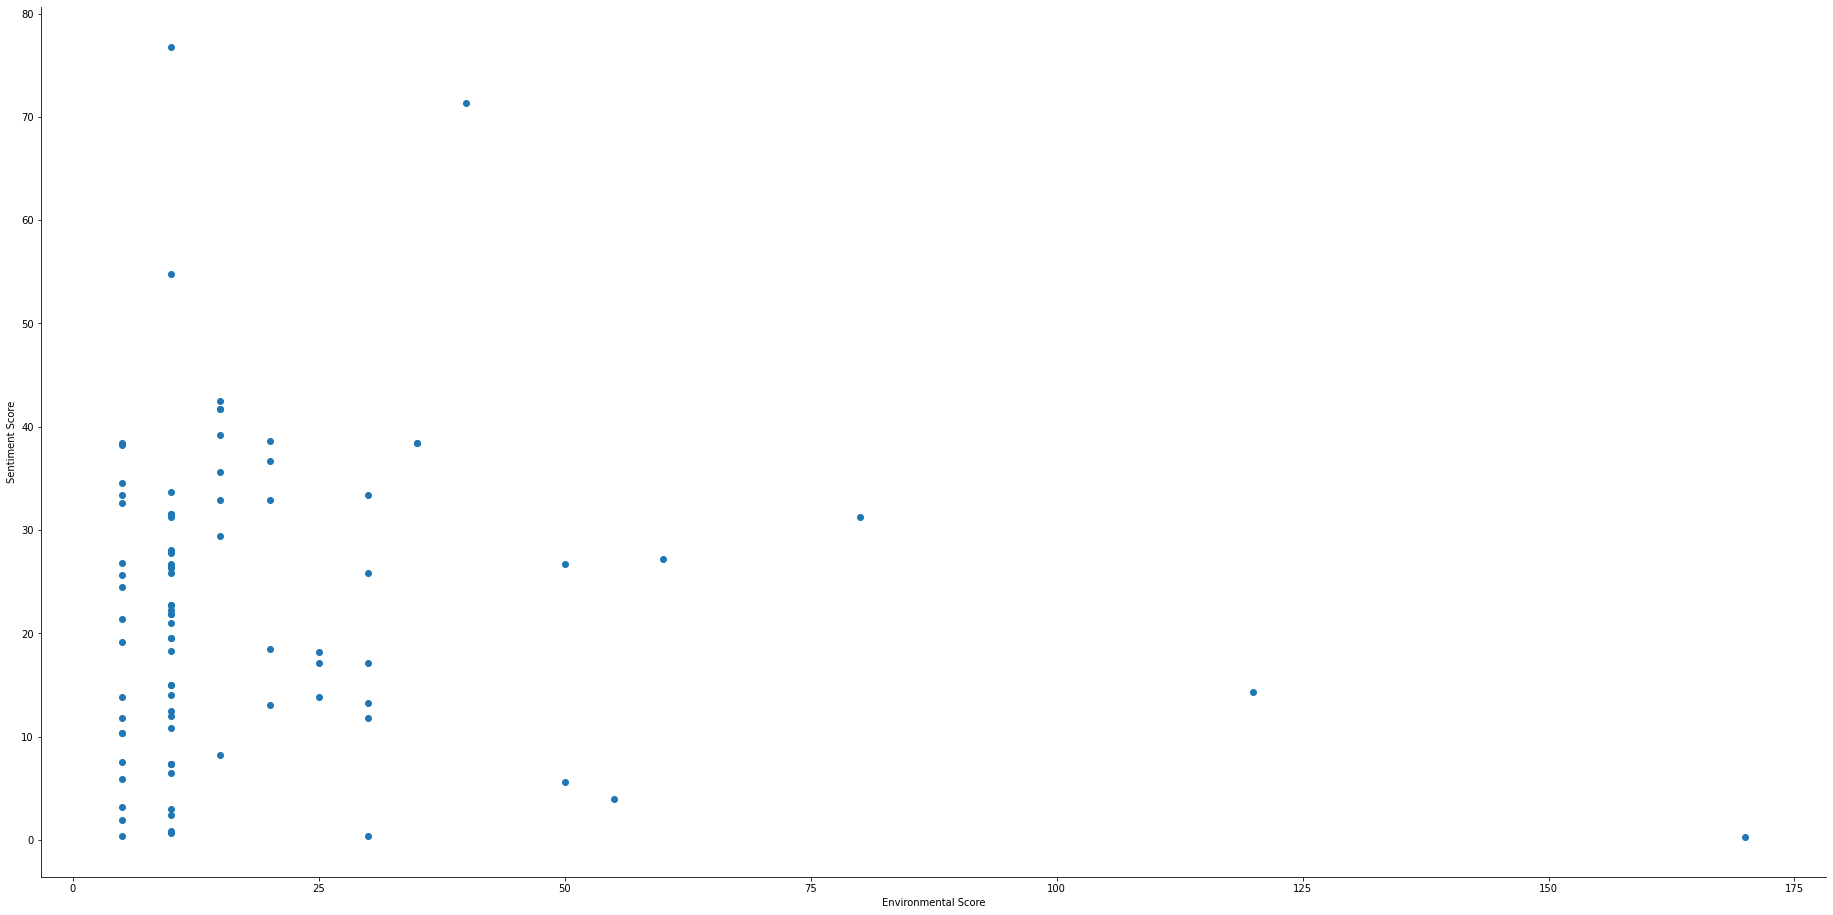

In [51]:
plt.scatter(aux2['Positive'], aux2['comments_sentiment'])
plt.xlabel('Environmental Score')
plt.ylabel('Sentiment Score')
plt.show()

In [53]:
from scipy.stats import pearsonr

corr, _ = pearsonr(aux2['Positive'], aux2['comments_sentiment'])
corr

-0.07505178764184346